In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
plt.style.use('ggplot')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:

# Read in data
df = pd.read_csv('/content/drive/MyDrive/reviews_with_sentiment.csv')
df.head()

top_id            date_modified  \
0  115447  2024-05-20 15:04:36.770   
1  115447  2024-05-20 15:04:36.770   
2  115447  2024-05-20 15:04:36.770   
3  115447  2024-05-20 15:04:36.770   
4  115447  2024-05-20 15:04:36.770   

                                                text  sentiment  
0  popped in here randomly on a sunday to get a b...          1  
1  everything wa delicious  even my husband  who ...          1  
2  the food is fresh  modern  and flavoursome  th...          1  
3  it ’ s a nice place to have a week end brunch ...          1  
4  nice scottish breakfast but service a little s...          1

In [4]:
#Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):

    # Check and handle if row['Lemmatised_Text'] is a list
    if isinstance(row['text'], list):
        row['text'] = " ".join(row['text'])  # Join list elements into a single string

    # Handle missing or non-string values
    if isinstance(row['text'], str):
        text = row['text']
        myid = row['top_id']
        res[myid] = sia.polarity_scores(text)
    else:
        print(f"Skipping row {i} due to invalid 'Text' value: {row['text']}")


  0%|          | 0/939668 [00:00<?, ?it/s]

Skipping row 8904 due to invalid 'Text' value: nan
Skipping row 62514 due to invalid 'Text' value: nan
Skipping row 163332 due to invalid 'Text' value: nan
Skipping row 244833 due to invalid 'Text' value: nan
Skipping row 424540 due to invalid 'Text' value: nan
Skipping row 469748 due to invalid 'Text' value: nan
Skipping row 502106 due to invalid 'Text' value: nan
Skipping row 578144 due to invalid 'Text' value: nan
Skipping row 601960 due to invalid 'Text' value: nan
Skipping row 810055 due to invalid 'Text' value: nan


In [5]:

# Convert results dictionary to DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'top_id'})
vaders = vaders.merge(df, on='top_id', how='left')


In [6]:

# Now we have sentiment score and metadata
vaders.head()

top_id    neg    neu    pos  compound            date_modified  \
0  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
1  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
2  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
3  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
4  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   

                                                text  sentiment  
0  popped in here randomly on a sunday to get a b...          1  
1  everything wa delicious  even my husband  who ...          1  
2  the food is fresh  modern  and flavoursome  th...          1  
3  it ’ s a nice place to have a week end brunch ...          1  
4  nice scottish breakfast but service a little s...          1

In [7]:
def analyze_sentiment(compound):
    # Determine overall sentiment based on the compound score
    if compound >= 0.5:
        overall_sentiment = 'Positive' #1
    elif compound <= -0.5:
        overall_sentiment = 'Negative' #0
    else:
        overall_sentiment = 'Neutral' #2
    return overall_sentiment

# Apply the function to create a new column 'overall_sentiment'
vaders['sentiment'] = vaders['compound'].apply(analyze_sentiment)
print(vaders['sentiment'].value_counts())
vaders.head()

sentiment
Positive    778334
Neutral     111294
Negative     50040
Name: count, dtype: int64


top_id    neg    neu    pos  compound            date_modified  \
0  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
1  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
2  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
3  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   
4  115447  0.035  0.746  0.219     0.968  2024-05-20 15:04:36.770   

                                                text sentiment  
0  popped in here randomly on a sunday to get a b...  Positive  
1  everything wa delicious  even my husband  who ...  Positive  
2  the food is fresh  modern  and flavoursome  th...  Positive  
3  it ’ s a nice place to have a week end brunch ...  Positive  
4  nice scottish breakfast but service a little s...  Positive

<ipython-input-8-55c274bb218c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='compound', data=vaders, palette='viridis')


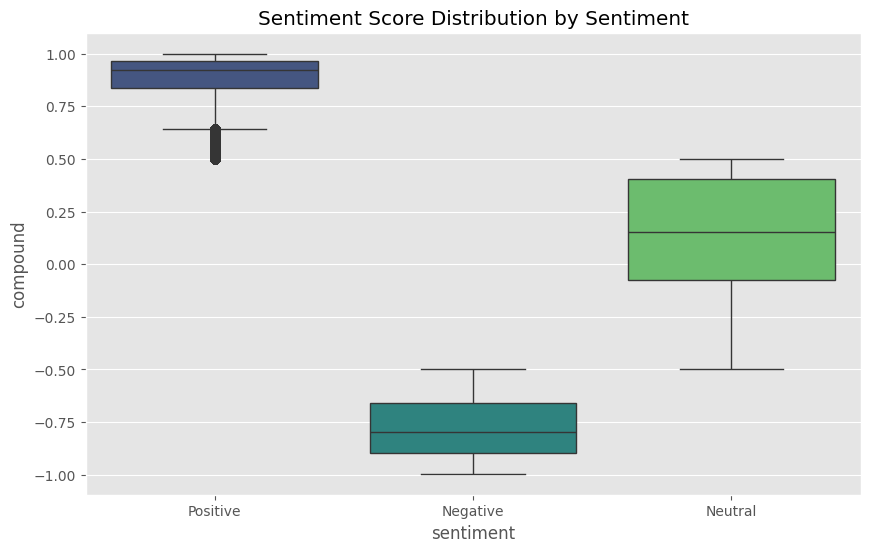

In [8]:
# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='compound', data=vaders, palette='viridis')
plt.title('Sentiment Score Distribution by Sentiment')
plt.show()

<ipython-input-9-3343ad4792bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')


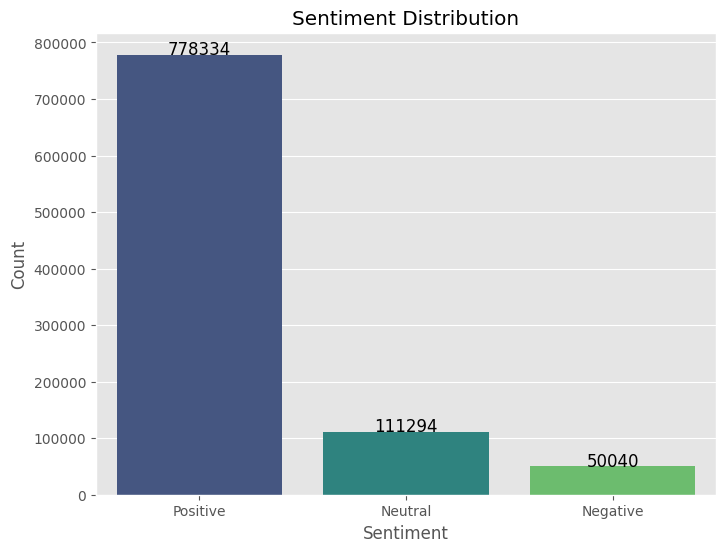

In [9]:
# Sample data (you should replace this with your actual DataFrame)
sentiment_counts = vaders['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')

# Add count annotations on top of each bar
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['count'], row['count'], color='black', ha="center", fontsize=12)

# Customize the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

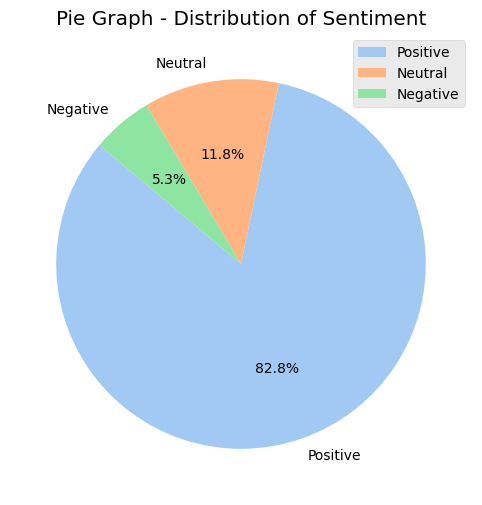

In [10]:
#Show distribution graphs for Flights class
class_counts = vaders['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%0.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Pie Graph - Distribution of Sentiment')
plt.legend()
plt.show()


text
<class 'str'>    939668
Name: count, dtype: int64


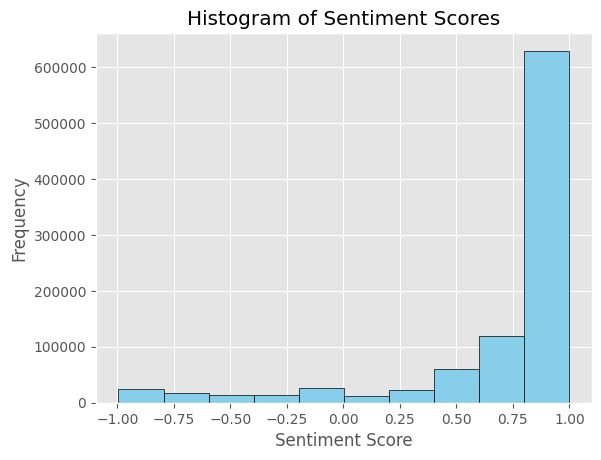

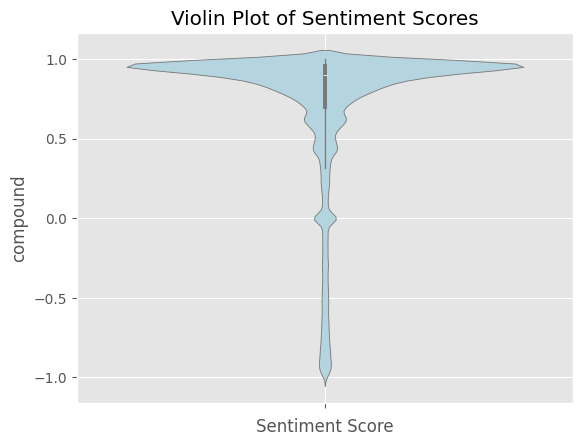

In [19]:
# Check for missing or non-string values in 'Lemmatised_Text'
print(vaders['text'].apply(type).value_counts())

# If there are float values, handle them appropriately.
# For example, you might replace them with empty strings:
vaders['text'] = vaders['text'].fillna('').astype(str)

plt.hist(vaders['compound'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.grid(True)
plt.show()
sns.violinplot(vaders['compound'], color='lightblue')
plt.xlabel('Sentiment Score')
plt.title('Violin Plot of Sentiment Scores')
plt.grid(True)
plt.show()

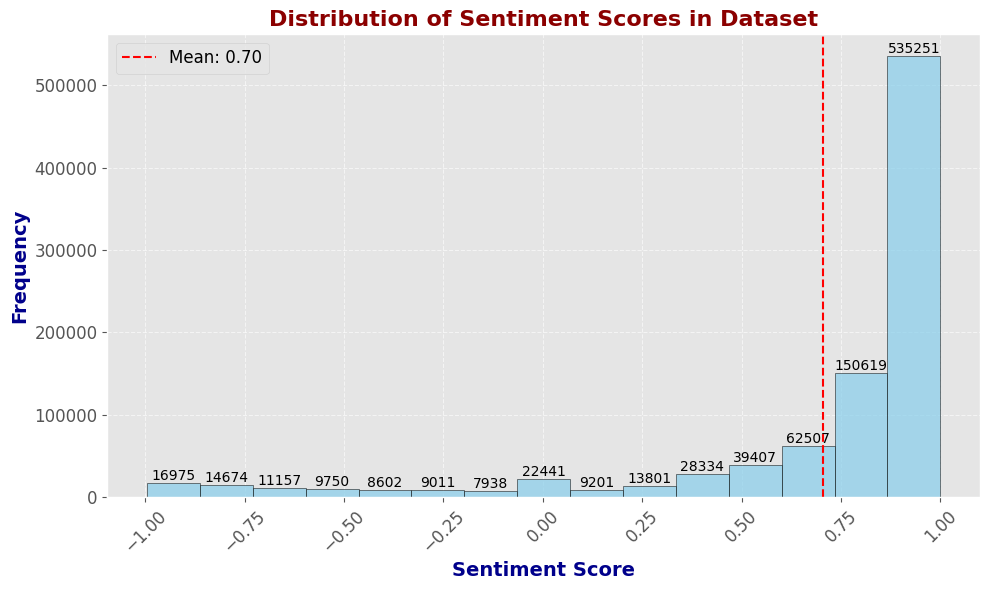

In [20]:

# Customizing the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(vaders['compound'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotations
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             f'{int(patches[i].get_height())}', ha='center', va='bottom', fontsize=10, color='black')

# Enhance labels and title
plt.xlabel('Sentiment Score', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Distribution of Sentiment Scores in Dataset', fontsize=16, fontweight='bold', color='darkred')

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a vertical line for mean sentiment score
mean_score = np.mean(vaders['compound'])
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_score:.2f}')
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-21-2be0f446e38c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='compound', data=vaders, palette='viridis')


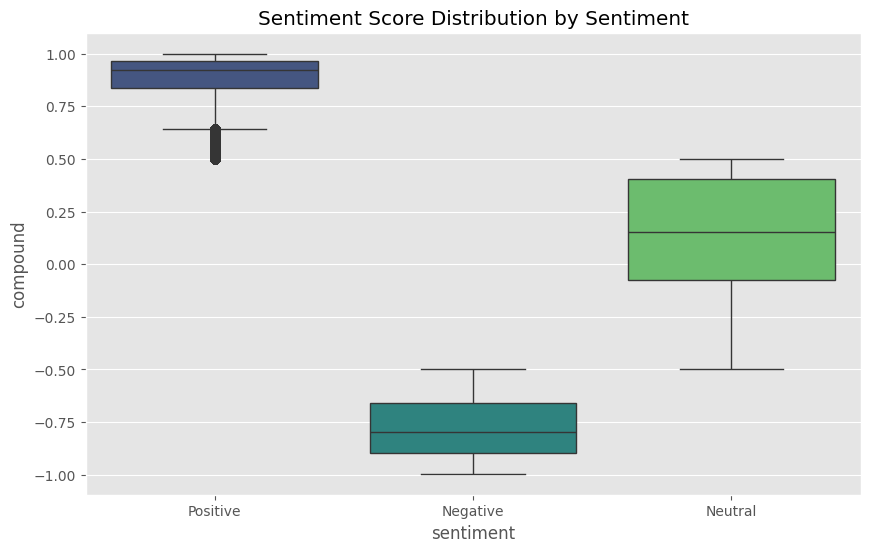

<ipython-input-21-2be0f446e38c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')


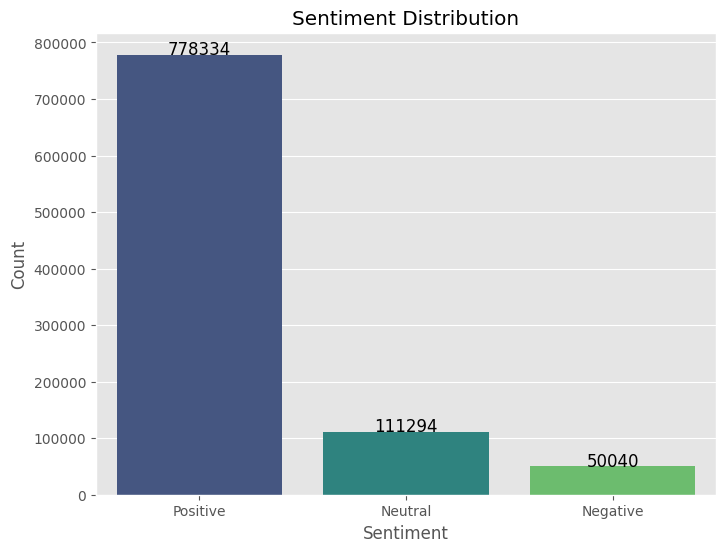

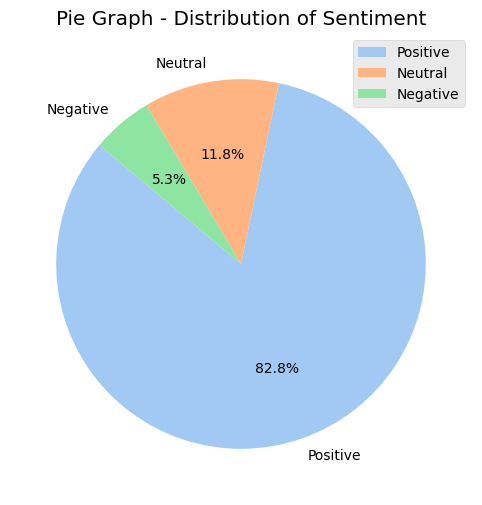

In [21]:
# prompt: visualizations

import matplotlib.pyplot as plt
# libraries for visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='compound', data=vaders, palette='viridis')
plt.title('Sentiment Score Distribution by Sentiment')
plt.show()

# Sample data (you should replace this with your actual DataFrame)
sentiment_counts = vaders['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')

# Add count annotations on top of each bar
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['count'], row['count'], color='black', ha="center", fontsize=12)

# Customize the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#Show distribution graphs for Flights class
class_counts = vaders['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%0.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Pie Graph - Distribution of Sentiment')
plt.legend()
plt.show()


text
<class 'str'>    939668
Name: count, dtype: int64


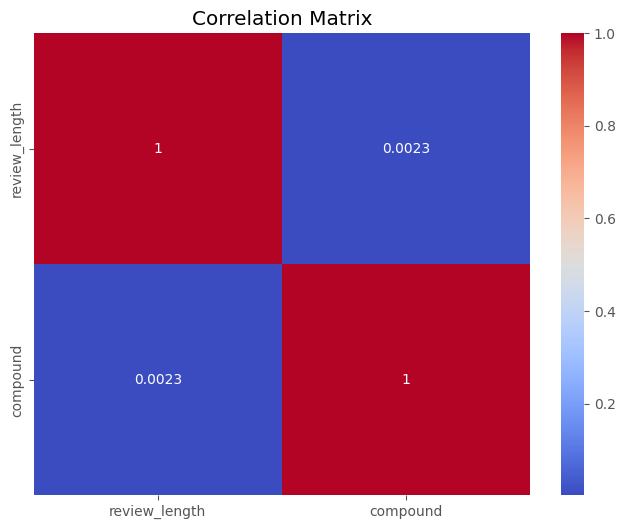

In [22]:
# Check for missing or non-string values in 'Lemmatised_Text'
print(vaders['text'].apply(type).value_counts())

# If there are float values, handle them appropriately.
# For example, you might replace them with empty strings:
vaders['text'] = vaders['text'].fillna('').astype(str)

# Now calculate review length
vaders['review_length'] = vaders['text'].apply(len)

# Continue with your correlation analysis
corr_matrix = vaders[['review_length', 'compound']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# List of words to analyze
words = ['good', 'bad', 'excellent', 'poor']

# Handle missing values in 'Lemmatised_Text'
vaders['text'] = vaders['text'].fillna('') # Replace missing values with empty strings

# Vectorize the text data (word counts)
vectorizer = CountVectorizer(vocabulary=words)
word_count_matrix = vectorizer.fit_transform(vaders['text']).toarray()

# Convert to DataFrame
word_count_df = pd.DataFrame(word_count_matrix, columns=words)
word_count_df['sentiment'] = vaders['sentiment']

# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = word_count_df.groupby('sentiment').sum()

# Display the heatmap data
print(heatmap_data)


             good    bad  excellent   poor
sentiment                                 
Negative    18588   2651       4733   2185
Neutral     39480   3145       9481   2446
Positive   303174  17535      98287  12442


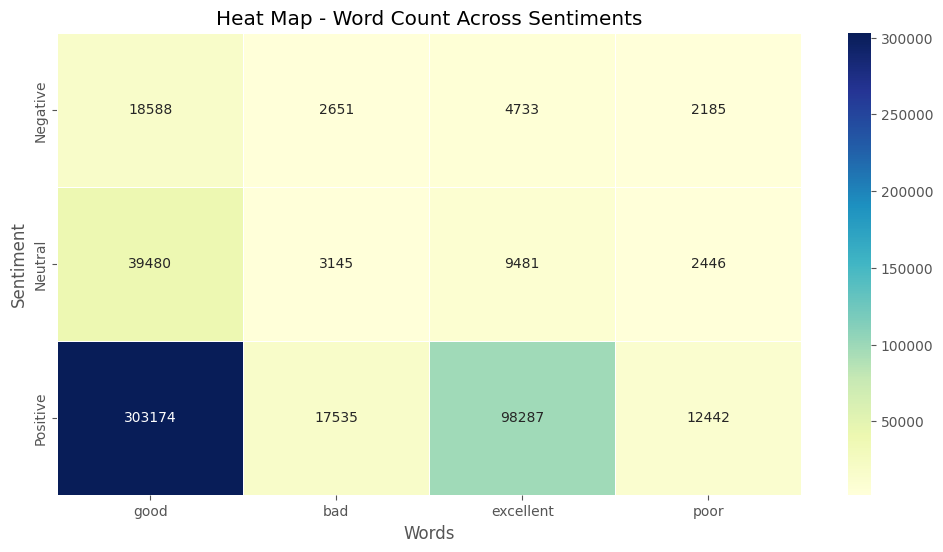

In [26]:
# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f',linewidths=.5)
plt.title('Heat Map - Word Count Across Sentiments')
plt.xlabel('Words')
plt.ylabel('Sentiment')
plt.show()


In [28]:


daily_reviews = vaders.groupby('date2').size().reset_index(name='review_count')


<ipython-input-29-4f9cc174ecfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date2', y='review_count', data=daily_reviews, palette='Blues_r')


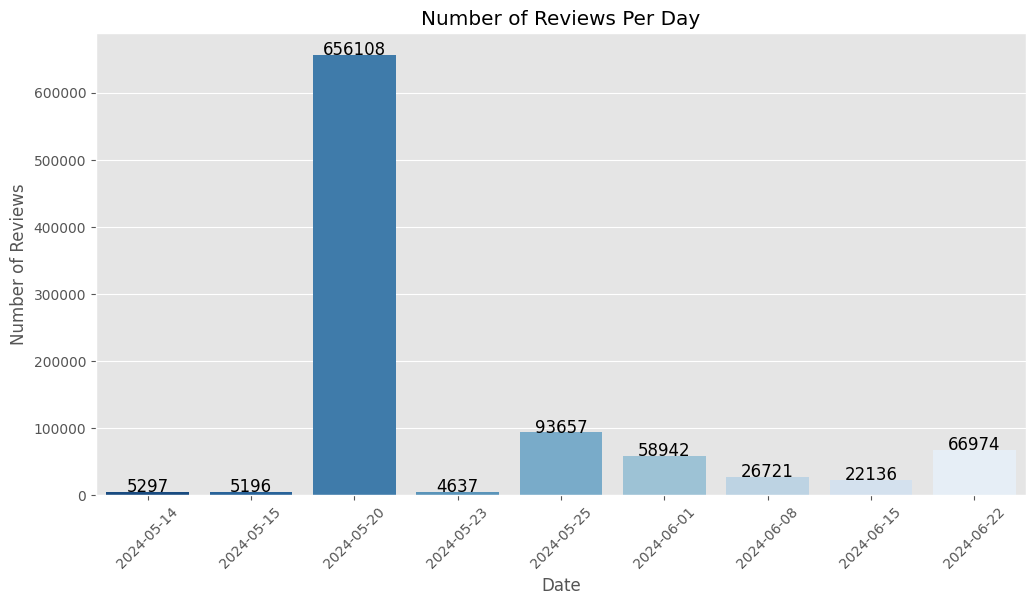

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='date2', y='review_count', data=daily_reviews, palette='Blues_r')
# Add count annotations on top of each bar
for index, row in daily_reviews.iterrows():
    plt.text(index, row['review_count'], row['review_count'], color='black', ha="center", fontsize=12) # Use 'review_count' instead of 'count'

plt.xticks(rotation=45)
plt.title('Number of Reviews Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


In [30]:
text_len = []
for text in vaders.text:
    review_len = len(text.split())
    text_len.append(review_len)

vaders['text_len'] = text_len

<ipython-input-31-011808819785>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=vaders[vaders['text_len']<10], palette='mako')


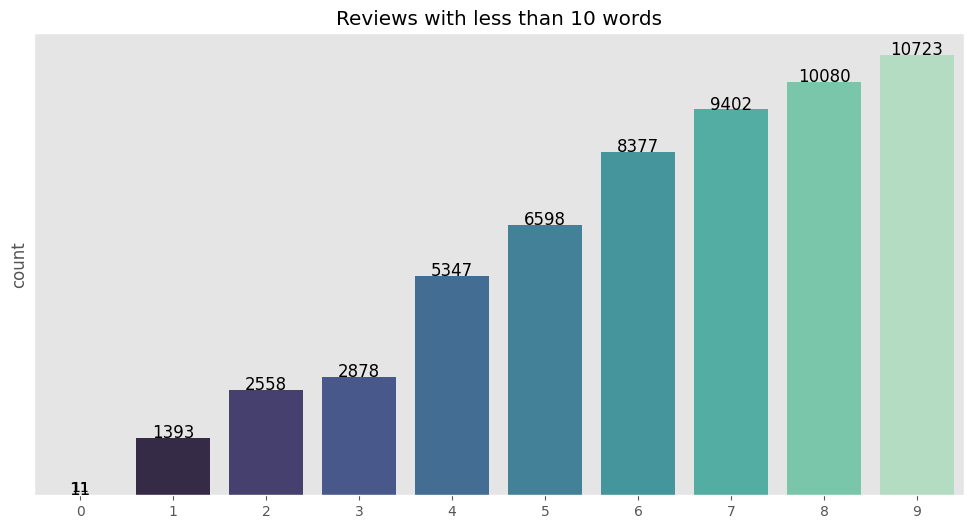

In [31]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='text_len', data=vaders[vaders['text_len']<10], palette='mako')

# Iterate over the unique values in 'text_len' and their counts
for value, count in vaders[vaders['text_len'] < 10]['text_len'].value_counts().items():
    plt.text(value, count, count, color='black', ha="center", fontsize=12)

plt.title('Reviews with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

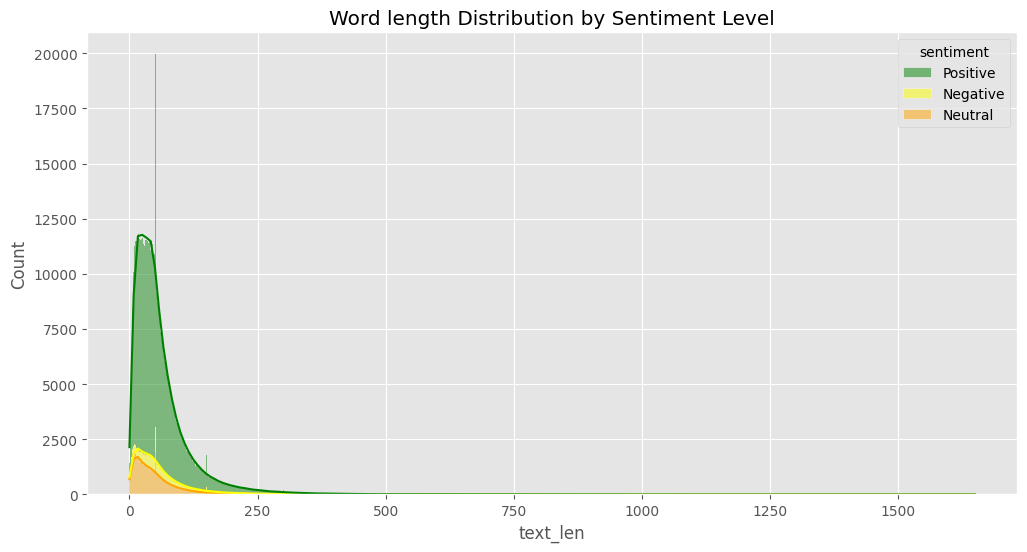

In [48]:
#plot the histogram for word length distribution with hue sentiment
plt.figure(figsize=(12, 6))
sns.histplot(data=vaders, x='text_len', hue='sentiment', multiple='stack', kde=True, palette=['green','yellow', 'orange'])
plt.title('Word length Distribution by Sentiment Level')
plt.xlabel('text_len')
plt.ylabel('Count')
plt.show()


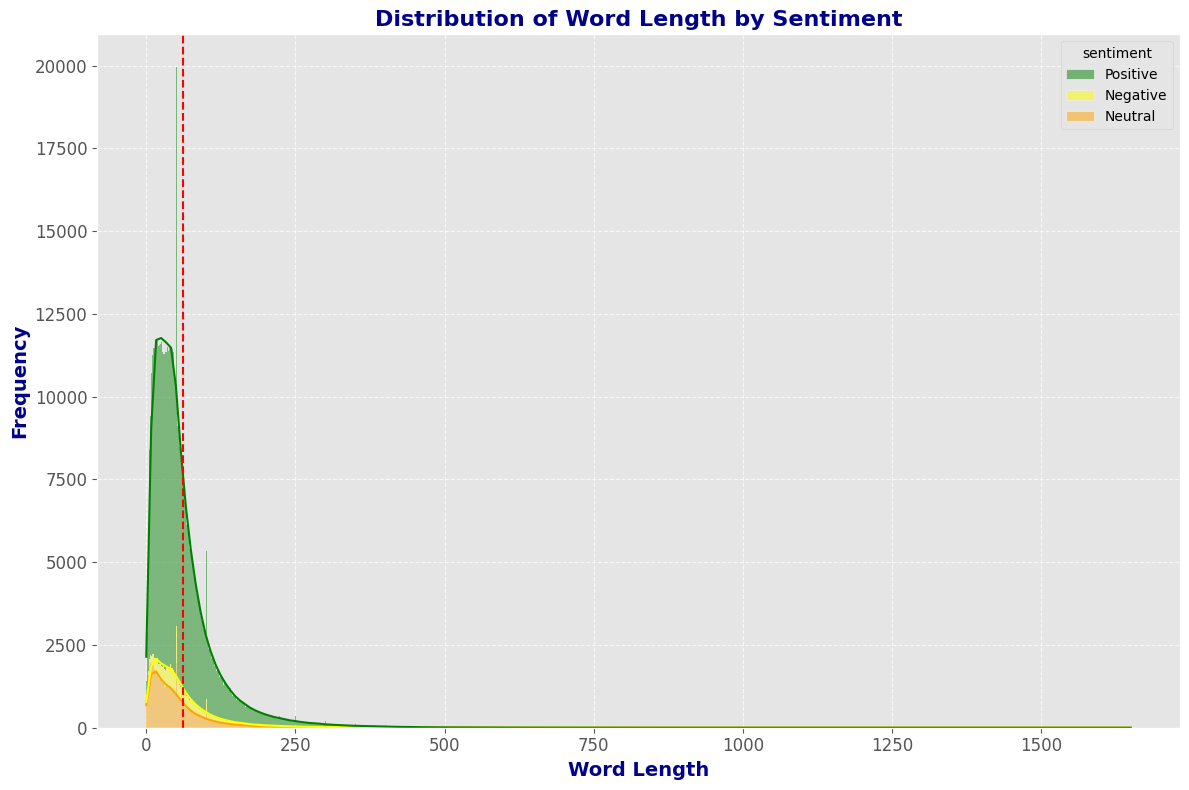

In [55]:
plt.figure(figsize=(12, 8))

# Plotting the histogram
sns.histplot(data=vaders, x='text_len', hue='sentiment', multiple='stack', kde=True, palette=['green', 'yellow', 'orange'])

# Adding Titles and Labels
plt.title('Distribution of Word Length by Sentiment', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Word Length', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')

# Customizing Grid and Ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding Legend and Annotations
#plt.legend(title='Sentiment', title_fontsize='13', fontsize='12')
plt.axvline(x=vaders['text_len'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean Word Length: {vaders["text_len"].mean():.2f}')
#plt.legend()

# Showing the plot
plt.tight_layout()
plt.show()


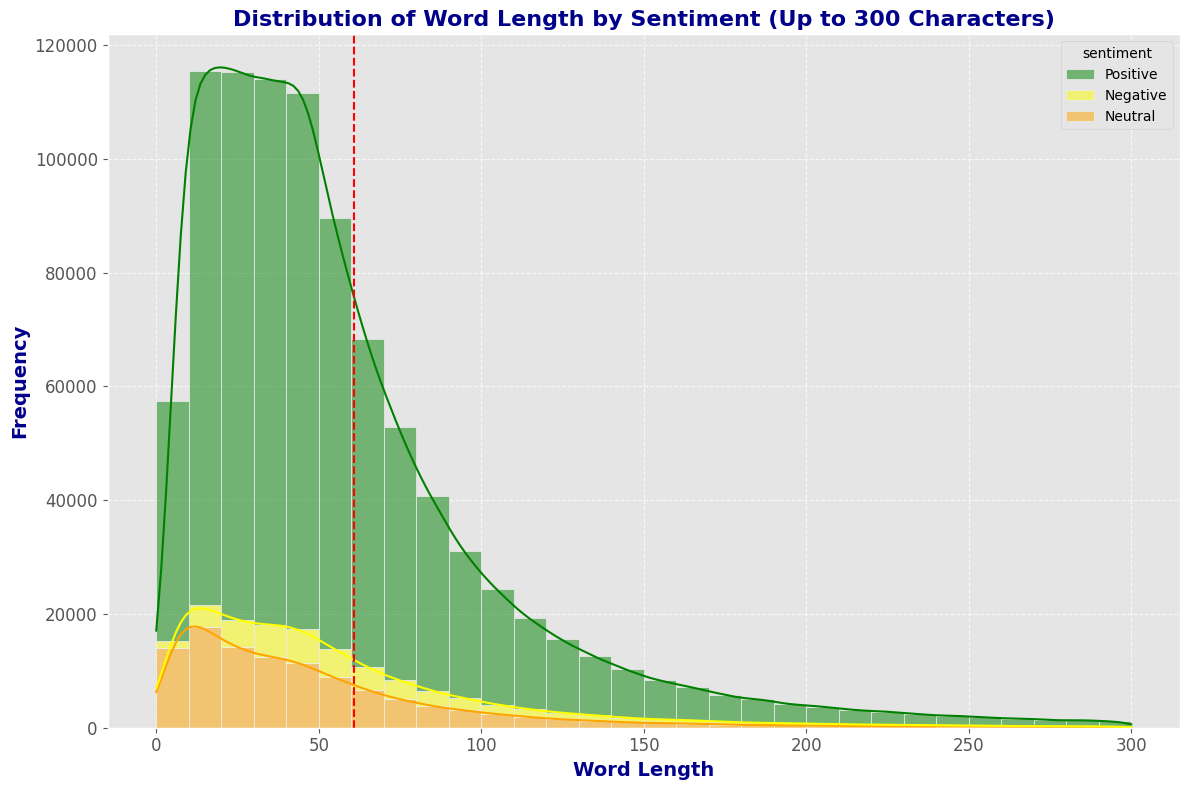

In [58]:

# Filter data to include only word lengths up to 300
filtered_data = vaders[vaders['text_len'] <= 300]

plt.figure(figsize=(12, 8))

# Plotting the histogram with filtered data
sns.histplot(data=filtered_data, x='text_len', hue='sentiment', multiple='stack', kde=True, palette=['green', 'yellow', 'orange'], bins=30)

# Adding Titles and Labels
plt.title('Distribution of Word Length by Sentiment (Up to 300 Characters)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Word Length', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')

# Customizing Grid and Ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=vaders['text_len'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean Word Length: {vaders["text_len"].mean():.2f}')

# Showing the plot
plt.tight_layout()
plt.show()


In [64]:
import plotly.express as px
import pandas as pd


# Filter data to include only word lengths up to 200
filtered_data = vaders[vaders['text_len'] <= 200]
plt.figure(figsize=(12, 8))
# Create the histogram with Plotly
fig = px.histogram(
    filtered_data,
    x='text_len',
    color='sentiment',
    nbins=30,  # Number of bins
    color_discrete_map={'positive': '#1f77b4', 'negative': '#ff7f0e'},
    title='Distribution of Word Length by Sentiment (Up to 200 Characters)',
    labels={'text_len': 'Word Length', 'count': 'Frequency'},
    hover_data={'text_len': False, 'sentiment': True}  # Display sentiment on hover
)

# Update layout for better appearance
fig.update_layout(
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis_title='Word Length',
    yaxis_title='Frequency',
    legend_title='Sentiment',
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=13,
    legend_font_size=12
)

# Show the interactive plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [66]:
import plotly.express as px
import pandas as pd



# Filter data to include only word lengths up to 200 (if needed)
filtered_data = vaders[vaders['text_len'] <= 200]

# Create the histogram with Plotly
fig = px.histogram(
    filtered_data,
    x='text_len',
    color='sentiment',
    nbins=30,  # Number of bins
    color_discrete_map={'positive': '#1f77b4', 'negative': '#ff7f0e'},  # Custom colors
    title='Distribution of Word Length by Sentiment (Up to 200 Characters)',
    labels={'text_len': 'Word Length', 'count': 'Frequency'},
    hover_data={'text_len': True, 'sentiment': True},  # Display text length and sentiment on hover
    category_orders={'sentiment': ['positive', 'negative']}  # Ensure sentiment order in legend
)

# Update layout for better appearance
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis_title='Word Length',
    yaxis_title='Frequency',
    legend_title='Sentiment',
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    legend_font_size=12,
    plot_bgcolor='rgba(240,240,240,0.9)',  # Light gray background for the plot
    paper_bgcolor='rgba(255,255,255,1)',  # White background for the paper
    font=dict(family='Arial, sans-serif', color='black'),  # Font customization
    legend=dict(
        orientation='h',  # Horizontal legend
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5
    )
)

# Add annotations for additional context
fig.add_annotation(
    x=filtered_data['text_len'].mean(),
    y=filtered_data['text_len'].value_counts().max() * 0.8,
    text=f"Mean Word Length: {filtered_data['text_len'].mean():.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color='black'),
    bgcolor='rgba(255,255,255,0.7)'
)

# Add gridlines for better readability
fig.update_xaxes(
    showgrid=True,
    gridcolor='lightgray',
    gridwidth=0.5
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgray',
    gridwidth=0.5
)

# Show the interactive plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
'''#drop unused columns
vaders = vaders.drop(columns=['neg', 'neu', 'pos', 'compound', 'text', 'Tokenised_Text'])
vaders = vaders.rename(columns={'Lemmatised_Text': 'text'})
vaders.head()'''

top_id            date_modified  \
0  115447  2024-05-20 15:04:36.770   
1  115447  2024-05-20 15:04:36.770   
2  115447  2024-05-20 15:04:36.770   
3  115447  2024-05-20 15:04:36.770   
4  115447  2024-05-20 15:04:36.770   

                                                text  sentiment  
0  popped in here randomly on a sunday to get a b...          1  
1  everything wa delicious  even my husband  who ...          1  
2  the food is fresh  modern  and flavoursome  th...          1  
3  it ’ s a nice place to have a week end brunch ...          1  
4  nice scottish breakfast but service a little s...          1

In [ ]:
#save as new csv file
#vaders.to_csv('reviews_with_sentiment.csv', index=False)